In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df1 = df.drop('User ID',axis=1)

In [7]:
df1.shape

(400, 4)

In [8]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


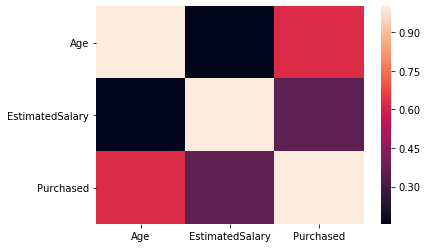

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df1.corr())
plt.show()

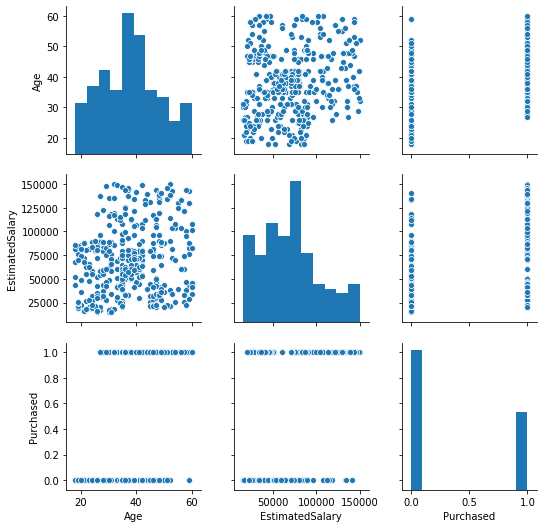

In [18]:
sns.pairplot(df1)

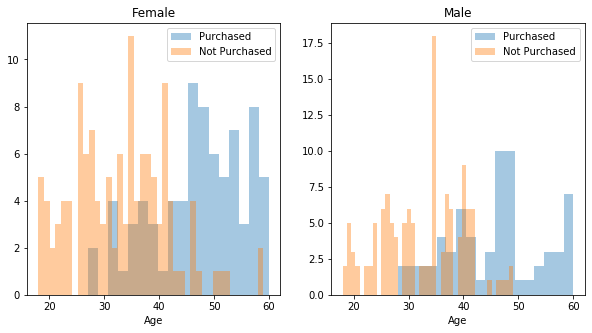

In [15]:
Purchased = 'Purchased'
Not_Purchased = 'Not Purchased'

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

Women = df1[df1['Gender']=='Female']
Men = df1[df1['Gender']=='Male']

ax = sns.distplot(Women[Women['Purchased']==1].Age.dropna(), bins=18, label = Purchased, ax = axes[0], kde =False)
ax = sns.distplot(Women[Women['Purchased']==0].Age.dropna(), bins=40, label = Not_Purchased, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(Men[Men['Purchased']==1].Age.dropna(), bins=18, label = Purchased, ax = axes[1], kde = False)
ax = sns.distplot(Men[Men['Purchased']==0].Age.dropna(), bins=40, label = Not_Purchased, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

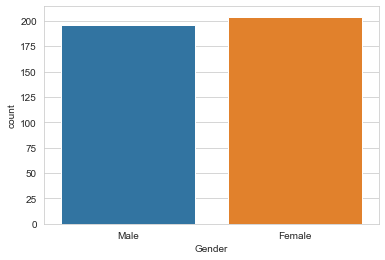

In [27]:
sns.countplot(x='Gender',data=df1)

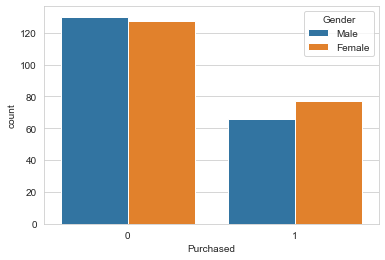

In [30]:
sns.countplot(x='Purchased',hue='Gender',data=df1)

In [32]:
df1.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [34]:
df1.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


In [35]:
def data_Gender(x):
    if x == 'Male':
        return 0
    else:
        return 1

In [36]:
df1['Gender'] = df1['Gender'].apply(data_Gender)

In [37]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [39]:
X = df1.drop('Purchased',axis=1)
Y = df1['Purchased']

In [41]:
X.shape

(400, 3)

In [42]:
Y.shape

(400,)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [45]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)

In [46]:
linreg = LinearRegression()
linreg.fit(X_train,Y_train)
Y_pred = linreg.predict(X_test)

linreg.score(X_train, Y_train)


acc_linreg = round(linreg.score(X_test, Y_test) * 100, 2)

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

C:\Users\NIKHIL SALUNKHE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

In [49]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)

In [50]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)

C:\Users\NIKHIL SALUNKHE\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [51]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)

C:\Users\NIKHIL SALUNKHE\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)

In [53]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

In [54]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Logistic Regression','KNN','Support Vector Machines',   
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linreg, acc_log, acc_knn, acc_linear_svc,  
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.75,Random Forest
91.25,Naive Bayes
87.50,Decision Tree
85.00,KNN
65.00,Logistic Regression
65.00,Support Vector Machines
65.00,Perceptron
47.49,Linear Regression
35.00,Stochastic Gradient Decent
